In [1]:
#6.1.4
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#6.1.5
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
#6.1.5
#Create a set of random latitudes and longitude combination.
lats = np.random.uniform(-90.000,90.000, size=1500)
lngs = np.random.uniform(-180.000,180.000, size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [4]:
#6.1.5
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-80.3531772823669, -89.01751928247333),
 (72.65629470768002, -36.23365933234621),
 (-64.88317208846797, 101.86978919213664),
 (-22.22918696825556, 137.79120335514392),
 (-61.74701626035966, -10.758201625991433),
 (12.45669331559904, -148.93250657409592),
 (-69.31650568053587, 81.07379046451541),
 (-7.2672209510911046, 101.13065957381843),
 (79.96634614281035, -119.52241639874956),
 (36.9594300364123, 21.739798347052556),
 (74.85721906274651, 96.14658478654735),
 (21.935933302201164, 66.84987031319429),
 (18.4174006225892, 120.81199822376539),
 (83.7085528775574, 53.388534193122894),
 (-43.70869222578148, -145.87739332935843),
 (22.054109697804023, -24.176733737197083),
 (-4.932678072365945, 149.27673301520684),
 (-12.080778662330971, -116.28734046399998),
 (56.93677122502629, 174.65914159546014),
 (-30.182233700887252, 75.94952729225429),
 (-26.236192997656133, -81.23937947714614),
 (-82.96238282686909, -115.99126470434673),
 (28.31652316899732, 134.07848256028626),
 (-19.08177078785

In [5]:
#6.1.5
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
#6.2.6
#Import dependencies (requests)
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

#import the API key
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an endpoint URL for a city.
#city_url = url + "&q=" + "Boston"
#print(city_url)

In [7]:
##6.2.6


In [8]:
#6.2.6
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# # Loop through the List of Cities and Build the City URL
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]
    

#Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
#6.2.6
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | mount isa
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | norman wells
Processing Record 10 of Set 1 | pilos
City not found. Skipping...
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | dwarka
Processing Record 13 of Set 1 | bangui
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | kimbe
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | beringovskiy
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | coquimbo
Processing Record 2

Processing Record 38 of Set 4 | bandarbeyla
Processing Record 39 of Set 4 | wanning
Processing Record 40 of Set 4 | newton stewart
Processing Record 41 of Set 4 | ribeira grande
Processing Record 42 of Set 4 | tual
Processing Record 43 of Set 4 | honiara
Processing Record 44 of Set 4 | faanui
Processing Record 45 of Set 4 | aksu
Processing Record 46 of Set 4 | rehoboth
Processing Record 47 of Set 4 | madang
Processing Record 48 of Set 4 | dali
Processing Record 49 of Set 4 | jeremoabo
Processing Record 50 of Set 4 | kavieng
Processing Record 1 of Set 5 | saint john
Processing Record 2 of Set 5 | vanavara
Processing Record 3 of Set 5 | saint-philippe
Processing Record 4 of Set 5 | nanortalik
Processing Record 5 of Set 5 | wilmington
Processing Record 6 of Set 5 | invermere
Processing Record 7 of Set 5 | cheuskiny
City not found. Skipping...
Processing Record 8 of Set 5 | balabac
Processing Record 9 of Set 5 | wattegama
Processing Record 10 of Set 5 | yamachiche
Processing Record 11 of S

Processing Record 31 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 32 of Set 8 | eskasem
City not found. Skipping...
Processing Record 33 of Set 8 | toftir
City not found. Skipping...
Processing Record 34 of Set 8 | ambunti
Processing Record 35 of Set 8 | atasu
Processing Record 36 of Set 8 | fortuna
Processing Record 37 of Set 8 | cidreira
Processing Record 38 of Set 8 | kletskaya
Processing Record 39 of Set 8 | mahajanga
Processing Record 40 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 41 of Set 8 | asheboro
Processing Record 42 of Set 8 | ocos
Processing Record 43 of Set 8 | mahadday weyne
City not found. Skipping...
Processing Record 44 of Set 8 | yingcheng
Processing Record 45 of Set 8 | launceston
Processing Record 46 of Set 8 | marystown
Processing Record 47 of Set 8 | meulaboh
Processing Record 48 of Set 8 | acapulco
Processing Record 49 of Set 8 | guarapari
Processing Record 50 of Set 8 | pemangkat
Processing Record 1 of Set 9 |

Processing Record 13 of Set 12 | hammerfest
Processing Record 14 of Set 12 | sisimiut
Processing Record 15 of Set 12 | eyl
Processing Record 16 of Set 12 | viedma
Processing Record 17 of Set 12 | port macquarie
Processing Record 18 of Set 12 | birao
Processing Record 19 of Set 12 | smirnykh
Processing Record 20 of Set 12 | humberto de campos
Processing Record 21 of Set 12 | grand gaube
Processing Record 22 of Set 12 | silchar
Processing Record 23 of Set 12 | abonnema
Processing Record 24 of Set 12 | praia da vitoria
Processing Record 25 of Set 12 | thinadhoo
Processing Record 26 of Set 12 | celestun
Processing Record 27 of Set 12 | raymondville
Processing Record 28 of Set 12 | bodoco
City not found. Skipping...
Processing Record 29 of Set 12 | sola
Processing Record 30 of Set 12 | oriximina
Processing Record 31 of Set 12 | leningradskiy
Processing Record 32 of Set 12 | tuatapere
Processing Record 33 of Set 12 | shingu
Processing Record 34 of Set 12 | uyuni
Processing Record 35 of Set 1

In [9]:
#6.2.7
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.tail(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
558,Moss Vale,-34.5500,150.3833,55.00,66,100,7.52,AU,2021-09-17 13:56:20
559,Bocaiuva,-17.1078,-43.8150,78.51,25,2,14.92,BR,2021-09-17 13:52:01
560,Kelowna,49.8831,-119.4857,60.76,66,90,1.01,CA,2021-09-17 13:53:01
561,Ushirombo,-3.4919,31.9639,85.91,33,39,5.03,TZ,2021-09-17 13:56:21
562,Caravelas,-17.7125,-39.2481,80.74,48,0,8.52,BR,2021-09-17 13:56:21
563,Copiapo,-27.3667,-70.3333,49.69,40,3,2.62,CL,2021-09-17 13:56:21
564,Biedenkopf,50.9167,8.5333,65.35,59,68,7.38,DE,2021-09-17 13:56:22
565,Ancud,-41.8697,-73.8203,49.42,84,65,12.08,CL,2021-09-17 13:56:22
566,Moindou,-21.6924,165.6770,60.75,64,6,5.75,NC,2021-09-17 13:56:23
567,Axim,4.8699,-2.2405,81.18,78,100,7.16,GH,2021-09-17 13:56:23


In [10]:
new_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2021-09-17 13:52:54,-53.1500,-70.9167,37.51,93,90,8.05
1,Tasiilaq,GL,2021-09-17 13:52:54,65.6145,-37.6368,35.71,57,100,5.12
2,Albany,US,2021-09-17 13:52:54,42.6001,-73.9662,70.61,85,33,6.60
3,Mount Isa,AU,2021-09-17 13:52:55,-20.7333,139.5000,65.97,37,0,0.00
4,Cape Town,ZA,2021-09-17 13:50:48,-33.9258,18.4232,72.12,55,0,4.00
...,...,...,...,...,...,...,...,...,...
563,Copiapo,CL,2021-09-17 13:56:21,-27.3667,-70.3333,49.69,40,3,2.62
564,Biedenkopf,DE,2021-09-17 13:56:22,50.9167,8.5333,65.35,59,68,7.38
565,Ancud,CL,2021-09-17 13:56:22,-41.8697,-73.8203,49.42,84,65,12.08
566,Moindou,NC,2021-09-17 13:56:23,-21.6924,165.6770,60.75,64,6,5.75


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
#6.3.1
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

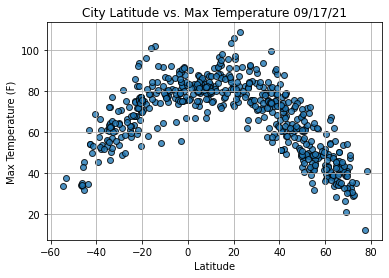

In [13]:
#6.3.1
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

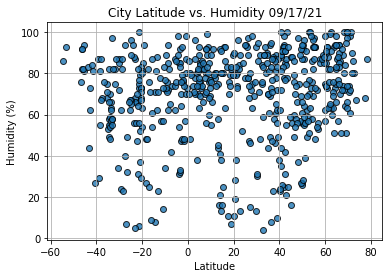

In [14]:
#6.3.2
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

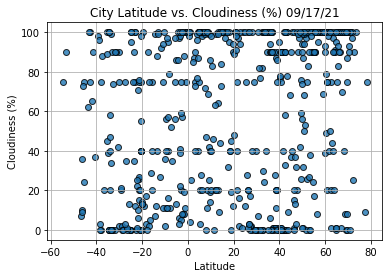

In [15]:
#6.3.3
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

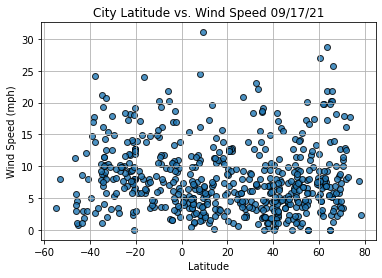

In [16]:
#6.3.4
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
#6.4.2
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
#6.4.2
index13=city_data_df.loc[13]
index13

City                 Ponta Do Sol
Country                        PT
Date          2021-09-17 13:52:58
Lat                       32.6667
Lng                         -17.1
Max Temp                    82.13
Humidity                       59
Cloudiness                     30
Wind Speed                    3.2
Name: 13, dtype: object

In [20]:
#6.4.2
city_data_df['Lat']>=0

0      False
1       True
2       True
3      False
4      False
       ...  
563    False
564     True
565    False
566    False
567     True
Name: Lat, Length: 568, dtype: bool

In [24]:
#6.4.2
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Tasiilaq,GL,2021-09-17 13:52:54,65.6145,-37.6368,35.71,57,100,5.12
2,Albany,US,2021-09-17 13:52:54,42.6001,-73.9662,70.61,85,33,6.60
5,Hilo,US,2021-09-17 13:52:23,19.7297,-155.0900,73.80,89,90,5.75
8,Norman Wells,CA,2021-09-17 13:52:56,65.2820,-126.8329,42.84,87,75,2.30
9,Khatanga,RU,2021-09-17 13:52:57,71.9667,102.5000,28.76,86,25,7.99


In [27]:
#6.4.2
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

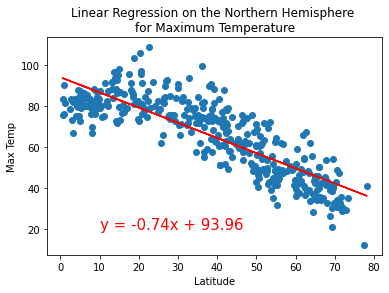

In [34]:
#6.4.2
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,20))

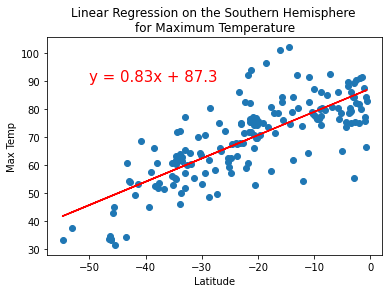

In [35]:
#6.4.2
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

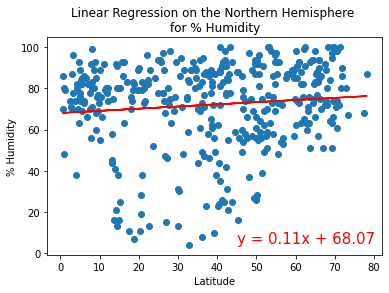

In [43]:
#6.4.3
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(45,5))

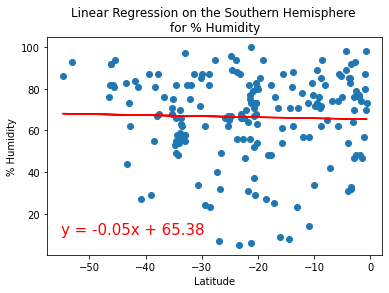

In [44]:
#6.4.3
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-55,10))

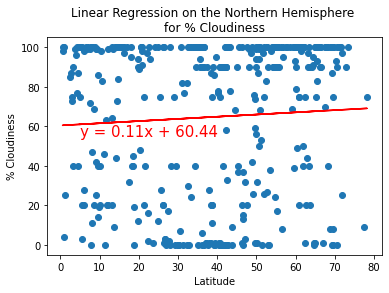

In [48]:
#6.4.4
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(5,55))

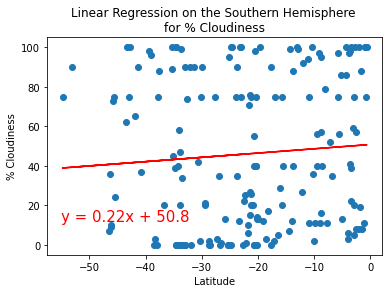

In [50]:
#6.4.4
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-55,12))

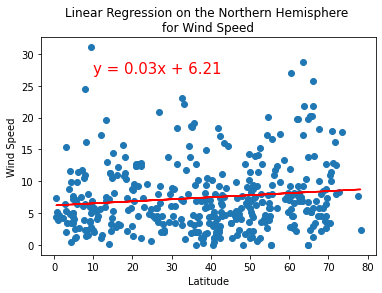

In [56]:
#6.4.5
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(10,27))

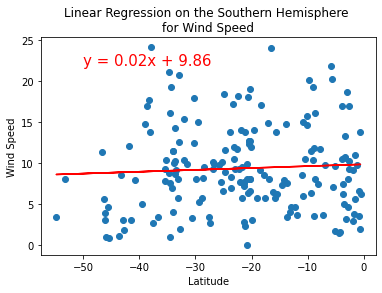

In [58]:
#6.4.5
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,22))